In [1]:
import pandas as pd
from config import PROCESSED_DATA_PATH

In [2]:
df = pd.read_parquet(PROCESSED_DATA_PATH)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int8    
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod 

In [5]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [4]:
features = df.select_dtypes(include=['category']).columns.tolist()
if 'Churn' in features:
    features.remove('Churn')

features

NameError: name 'df' is not defined

In [14]:
from config import MODEL_DIR
import joblib
model_path = MODEL_DIR / "avg_monthly_added_v1.pkl"
pipeline = joblib.load(model_path)

model = pipeline.named_steps['classifier']
preprocessor = pipeline.named_steps['preprocessor']

features = preprocessor.get_feature_names_out()

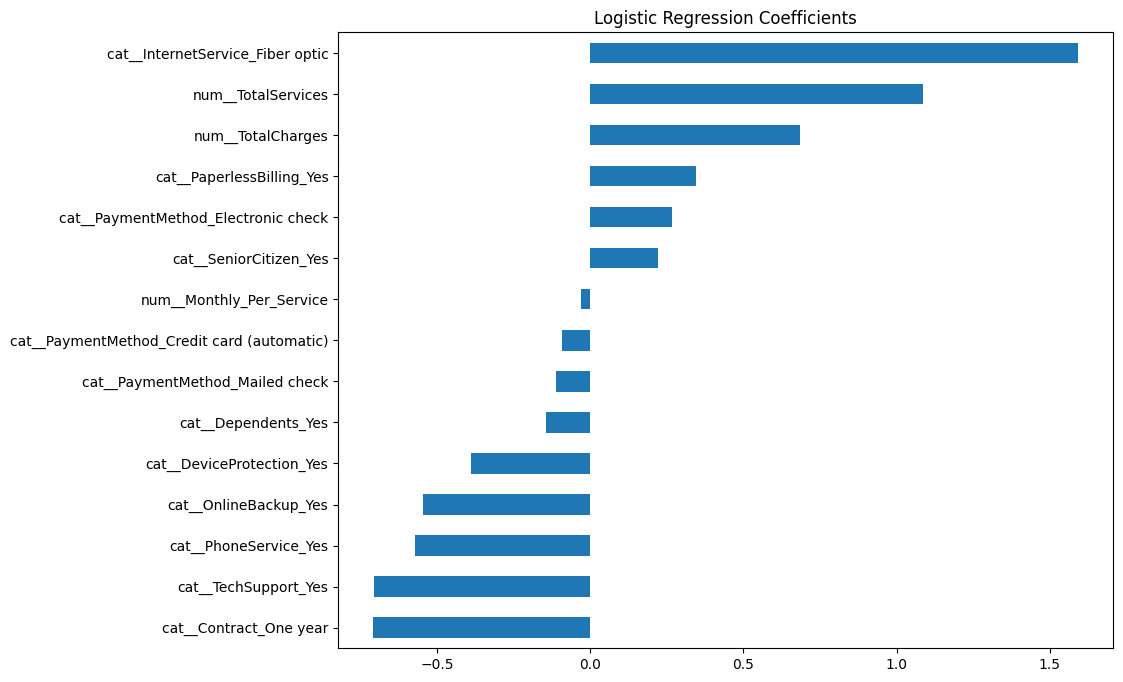

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
# Check if it's LogReg (coef_) or Trees (feature_importances_)
if hasattr(model, 'coef_'):
    importance = model.coef_[0]
    title = "Logistic Regression Coefficients"
else:
    importance = model.feature_importances_
    title = "Tree-based Feature Importance"

# Plotting
feat_imp = pd.Series(importance, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
feat_imp.head(15).plot(kind='barh').invert_yaxis()
plt.title(title)
plt.show()

In [ ]:
feat_imp

cat__InternetService_Fiber optic              1.592189
num__TotalServices                            1.086948
num__TotalCharges                             0.683175
cat__PaperlessBilling_Yes                     0.344861
cat__PaymentMethod_Electronic check           0.266417
cat__SeniorCitizen_Yes                        0.219849
num__Monthly_Per_Service                     -0.031555
cat__PaymentMethod_Credit card (automatic)   -0.093718
cat__PaymentMethod_Mailed check              -0.111184
cat__Dependents_Yes                          -0.142997
cat__DeviceProtection_Yes                    -0.390696
cat__OnlineBackup_Yes                        -0.544817
cat__PhoneService_Yes                        -0.573706
cat__TechSupport_Yes                         -0.704874
cat__Contract_One year                       -0.707858
cat__OnlineSecurity_Yes                      -0.743909
num__Avg_Monthly_Spent                       -1.124157
num__tenure                                  -1.141058
cat__Inter

: 